In [39]:
# IMPORTS BEGIN
import os
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.utils import resample 
from keras import backend as K
from keras.models import Model
from keras import initializers
from keras.engine.topology import Layer
from keras.layers import Dense, Input
from keras.layers import Embedding, GRU, Bidirectional, TimeDistributed
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from nltk import tokenize
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import math
import numpy as np
from gensim.models import Word2Vec
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans
from sklearn import preprocessing
from sklearn.model_selection import ParameterGrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# IMPORTS END

In [2]:
path_prefix = "/mnt/SWTM_WORK/FEB_21/CSS_GRID_FS_LOG_DOWNLOADER/CSS_LOGS/5fca5177814ca51ee41de1b6/HW_CSS-FWR-IN-210_PlayList_AP100_SeqRandReadWrites/Driver_Logs/HW_LOGS/CTUA/"

In [3]:
input_data1 = pd.read_csv(path_prefix+'drugscomTrain_raw.tsv', sep='\t')
input_data2 = pd.read_csv(path_prefix+'drugscomTest_raw.tsv', sep='\t')
input_data = pd.concat([input_data1, input_data2], ignore_index=True)

In [4]:
def limit_count_per_column(df, column, low=10, high=20):
    in_limits_df =  df.groupby(column).filter(lambda x: high>=len(x)>=low)
    gt_limit_columns = list(df.groupby(column).filter(lambda x: len(x)>high)[column].unique())
    for column_val in gt_limit_columns:
        in_limits_df = pd.concat([in_limits_df,resample(df[df[column]==column_val]
                                                      ,replace=False,n_samples=20,random_state=100)])
    in_limits_df = in_limits_df.reset_index(drop=True)
    return in_limits_df

In [5]:
input_data = limit_count_per_column(input_data, 'condition')

In [6]:
input_data.shape

(8920, 7)

In [7]:
input_data['id'] = 0
input_data['id'] = input_data.index + 880

In [8]:
input_data = input_data.rename(columns = {'review':'text','condition':'class'})

In [9]:
input_data.to_csv('complete_data.csv')

In [10]:
input_data 

,Unnamed: 0,drugName,class,text,rating,date,usefulCount,id
0,34093,Zoledronic acid,Osteolytic Bone Metastases of Solid Tumors,"""I dreaded the side-effects and had NONE. I h...",10.0,"January 25, 2012",31,880
1,97654,Methimazole,Hyperthyroidism,"""My 6yr old daughter and I have been dealing w...",4.0,"July 11, 2016",3,881
2,184954,Trolamine salicylate,Bursitis,"""Did help relieve some of the pain temporarily...",7.0,"April 19, 2009",25,882
3,196987,Paroxetine,Trichotillomania,"""I have OCD, anxiety, and ADHD. I also pick my...",10.0,"April 26, 2016",15,883
4,35476,Phenol,Sore Throat,"""I will personally attest to this,,,\r\n33 yea...",6.0,"November 5, 2016",7,884
...,...,...,...,...,...,...,...,...
8915,22696,Midodrine,Postural Orthostatic Tachycardia Syndrome,"""Didn&#039;t seem to lower my heart rate very ...",3.0,"October 1, 2010",34,9795
8916,46963,Fludrocortisone,Postural Orthostatic Tachycardia Syndrome,"""I have taken this medicine along with Toprol-...",10.0,"August 10, 2010",14,9796
8917,41794,Clonidine,Postural Orthostatic Tachycardia Syndrome,"""Very useful for helping to level out the surg...",9.0,"May 18, 2013",23,9797
8918,163400,Methylphenidate,Postural Orthostatic Tachycardia Syndrome,"""Two months ago, I was unable to work or to dr...",8.0,"January 16, 2017",5,9798


In [11]:
from d2v_pre import d2v_pre
from getEmbeddings import getEmbeddings
import numpy as np

d2v_pre('complete_data.csv')

x,y = getEmbeddings('complete_data_doc2vec.csv')

In [12]:
y

array([323., 221.,  95., ..., 362., 362., 362.])

In [13]:
x.shape

(8920, 300)

Vector Visualization

In [14]:
x[0]

array([ 4.52083023e-03, -3.96923954e-03, -2.09783632e-02,  7.43732899e-02,
        1.45194698e-02, -5.25866123e-03, -3.63352969e-02,  2.62472183e-02,
       -4.09295969e-02, -5.17643094e-02, -5.92342317e-02, -1.27808675e-02,
       -9.17322282e-03,  2.23895628e-02, -3.29361558e-02,  6.81831548e-03,
       -1.54599603e-02,  4.28135730e-02,  2.87868381e-02, -4.57566753e-02,
       -2.23694686e-02,  1.21360160e-02,  4.64417040e-03, -6.13561533e-02,
        3.12122684e-02,  4.07536440e-02, -7.32638538e-02, -6.72882348e-02,
        4.12702560e-03, -5.14443917e-03, -2.30196174e-02, -3.77197452e-02,
        4.75223847e-02, -2.82760859e-02, -4.24565934e-03, -8.02361965e-02,
       -3.93369198e-02,  3.18238288e-02, -8.27607661e-02,  4.46931161e-02,
       -1.80523954e-02,  5.54470718e-02, -1.29411451e-03, -5.92665421e-03,
       -5.64973317e-02, -2.77021993e-02, -1.23728067e-02, -7.21133733e-03,
        2.08311975e-02, -1.51689593e-02, -3.24043855e-02, -2.38005277e-02,
       -5.26013970e-03,  

Pre Clustering Analysis Plot

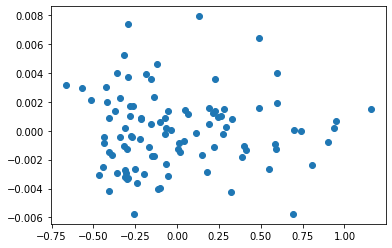

In [15]:

pca = PCA(n_components=2)
reduced = pca.fit_transform(x[:100])

t = reduced.transpose()

plt.scatter(t[0], t[1])
plt.show()

Clustering Models

In [16]:
def k_means(data, n_clusters=480, max_iter=1000):
    model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)
    return model
def agglomerative_fn(data, n_clusters=480):
    model = AgglomerativeClustering(n_clusters = n_clusters).fit(data)
    return model
def dbscan_fn(data, eps=0.45, min_samples=4):
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    return model
def mean_shift_fn(data, bandwidth=0.85):
    model = MeanShift(bandwidth=bandwidth).fit(data)
    return model
def birch_fn(data, n_clusters=480):
    model = Birch(n_clusters=n_clusters).fit(data)
    return model
def affinity_propagation_fn(data, damping=0.6, max_iter=1000):
    model = AffinityPropagation(damping=damping, max_iter=max_iter).fit(data)
    return model
def mini_batch_kmeans_fn(data, n_clusters=480, max_iter=1000):
    model = MiniBatchKMeans(n_clusters=n_clusters, max_iter=max_iter, batch_size=20).fit(data)
    return model

In [36]:
def build_model(clustering_model, data, labels):
    
    model = clustering_model(data)

    print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    print(50 * '-')
    
    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          %(metrics.homogeneity_score(labels, model.labels_),
            metrics.completeness_score(labels, model.labels_),
            metrics.v_measure_score(labels, model.labels_),
            metrics.adjusted_rand_score(labels, model.labels_),
            metrics.adjusted_mutual_info_score(labels,  model.labels_),
            metrics.silhouette_score(data, model.labels_)))

In [18]:
build_model(k_means, x, y)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.498	0.514	0.506	0.000	0.002	0.008


In [19]:
build_model(agglomerative_fn, x, y)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.502	0.516	0.509	0.000	0.002	0.012


In [22]:
build_model(dbscan_fn, x, y)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
-0.000	1.000	-0.000	0.000	-0.000


In [30]:
build_model(mean_shift_fn, x, y)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
-0.000	1.000	-0.000	0.000	-0.000


In [34]:
build_model(birch_fn,x, y)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
-0.000	1.000	-0.000	0.000	-0.000


In [37]:
build_model(affinity_propagation_fn, x, y)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.917	0.659	0.767	0.001	0.003	0.018


In [38]:
build_model(mini_batch_kmeans_fn, x, y)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.277	0.386	0.322	0.000	0.004	-0.058
